In [1]:
import music21
from music21.note import Note
from common import ANNOTATIONSCOREDUPLES
import seaborn as sns
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from score_parser import parseScore
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [2]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.a_isOnset].a_pitchNames.index.to_list()
    annotationNotes = a[a.a_isOnset].a_pitchNames.to_list()
    annotationText = a[a.a_isOnset].a_romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

def getNonChordSequence(annotationRanges, s):
    ret = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end].iloc[:-1]
        originalNotes = slices.s_notes.to_list()
        originalNoteNames = [Note(n).name for chord in originalNotes for n in chord]
        nonChordTones = set(originalNoteNames) - set(annotationNotes)
        missingNotes = set(annotationNotes) - set(originalNoteNames)
        originalNonChord = [n for n in originalNoteNames if n in nonChordTones]
        if not originalNotes:
            missingNotesFactor = 1.0
            nonChordToneFactor = 1.0
        else:
            missingNotesRatio = len(missingNotes) / len(set(annotationNotes))
            nonChordToneRatio = len(originalNonChord) / len(originalNoteNames)
#         print('original notes:', originalNoteNames)
#         print('notes implied by annotation:', annotationNotes)
#         print('potential non-chord tones:', originalNonChord)
#         print('missing notes from annotation:', missingNotesFactor)
#         print(start, end, annotationNotes, nonChordToneFactor)
        ret.append((originalNoteNames, nonChordToneRatio, missingNotesRatio))
    return ret

In [3]:
f = "wir-bach-chorales-14"
aPath, sPath = ANNOTATIONSCOREDUPLES[f]

In [4]:
aScore = music21.converter.parse(aPath, format="romantext").show("musicxml")
# sScore = music21.converter.parse(sPath).chordify().show("musicxml")

In [5]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
annotationRanges = getAnnotationOffsets(a)
scoreMetrics = getNonChordSequence(annotationRanges, s)

In [6]:
qualitydfdict = {
    "start": [],
    "end": [],
    "romanNumeral": [],
    "annotationPitchNames": [],
    "scorePitchNames": [],
    "nonChordRatio": [],
    "missingNotesRatio": []
}

for i in range(len(annotationRanges)):
    start, end, annotationPitchNames, romanNumeral = annotationRanges[i]
    scorePitchNames, nonChordRatio, missingNotesRatio = scoreMetrics[i]
    qualitydfdict["start"].append(start)
    qualitydfdict["end"].append(end)
    qualitydfdict["romanNumeral"].append(romanNumeral)
    qualitydfdict["annotationPitchNames"].append(annotationPitchNames)
    qualitydfdict["scorePitchNames"].append(scorePitchNames)
    qualitydfdict["nonChordRatio"].append(nonChordRatio)
    qualitydfdict["missingNotesRatio"].append(missingNotesRatio)

In [7]:
qualitydf = pd.DataFrame(qualitydfdict)

In [8]:
qualitydf

,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio
0,0.0,1.0,I,"(G, B, D)","[G, B, D, G, G, B, D, G, G, B, D, G, G, B, D, G]",0.0000,0.000000
1,1.0,2.0,vi,"(E, G, B)","[E, B, E, G, E, B, E, G, E, B, E, G, E, B, E, G]",0.0000,0.000000
2,2.0,3.0,iii,"(B, D, F#)","[B, B, D, F#, B, B, D, F#, B, A, D, F#, B, A, ...",0.1250,0.000000
3,3.0,4.0,IV,"(C, E, G)","[C, G, C, E, C, G, C, E, C, G, C, E, C, G, C, E]",0.0000,0.000000
4,4.0,5.0,V7,"(D, F#, A, C)","[D, F#, C, D, D, F#, C, D, D, F#, C, D, D, F#,...",0.0000,0.250000
5,5.0,6.0,vi,"(E, G, B)","[E, G, B, G, E, G, B, G, E, G, B, G, E, G, B, G]",0.0000,0.000000
6,6.0,7.0,V,"(D, F#, A)","[D, F#, D, A, D, F#, D, A, D, F#, D, A, D, F#,...",0.0000,0.000000
7,7.0,8.0,I,"(G, B, D)","[G, G, D, B, G, G, D, B, G, G, D, B, G, G, D, B]",0.0000,0.000000
8,8.0,9.0,V,"(D, F#, A)","[D, F#, D, A, D, F#, D, A, C, F#, D, A, C, F#,...",0.1250,0.000000
9,9.0,10.0,iii,"(B, D, F#)","[B, F#, D, B, B, F#, D, B, B, F#, D, C, B, F#,...",0.0625,0.000000


4.3125 1.8333333333333333 2.333767361111111
Top problematic annotations:


,start,end,romanNumeral,annotationPitchNames,scorePitchNames,nonChordRatio,missingNotesRatio,score


(0.0, 4.0)

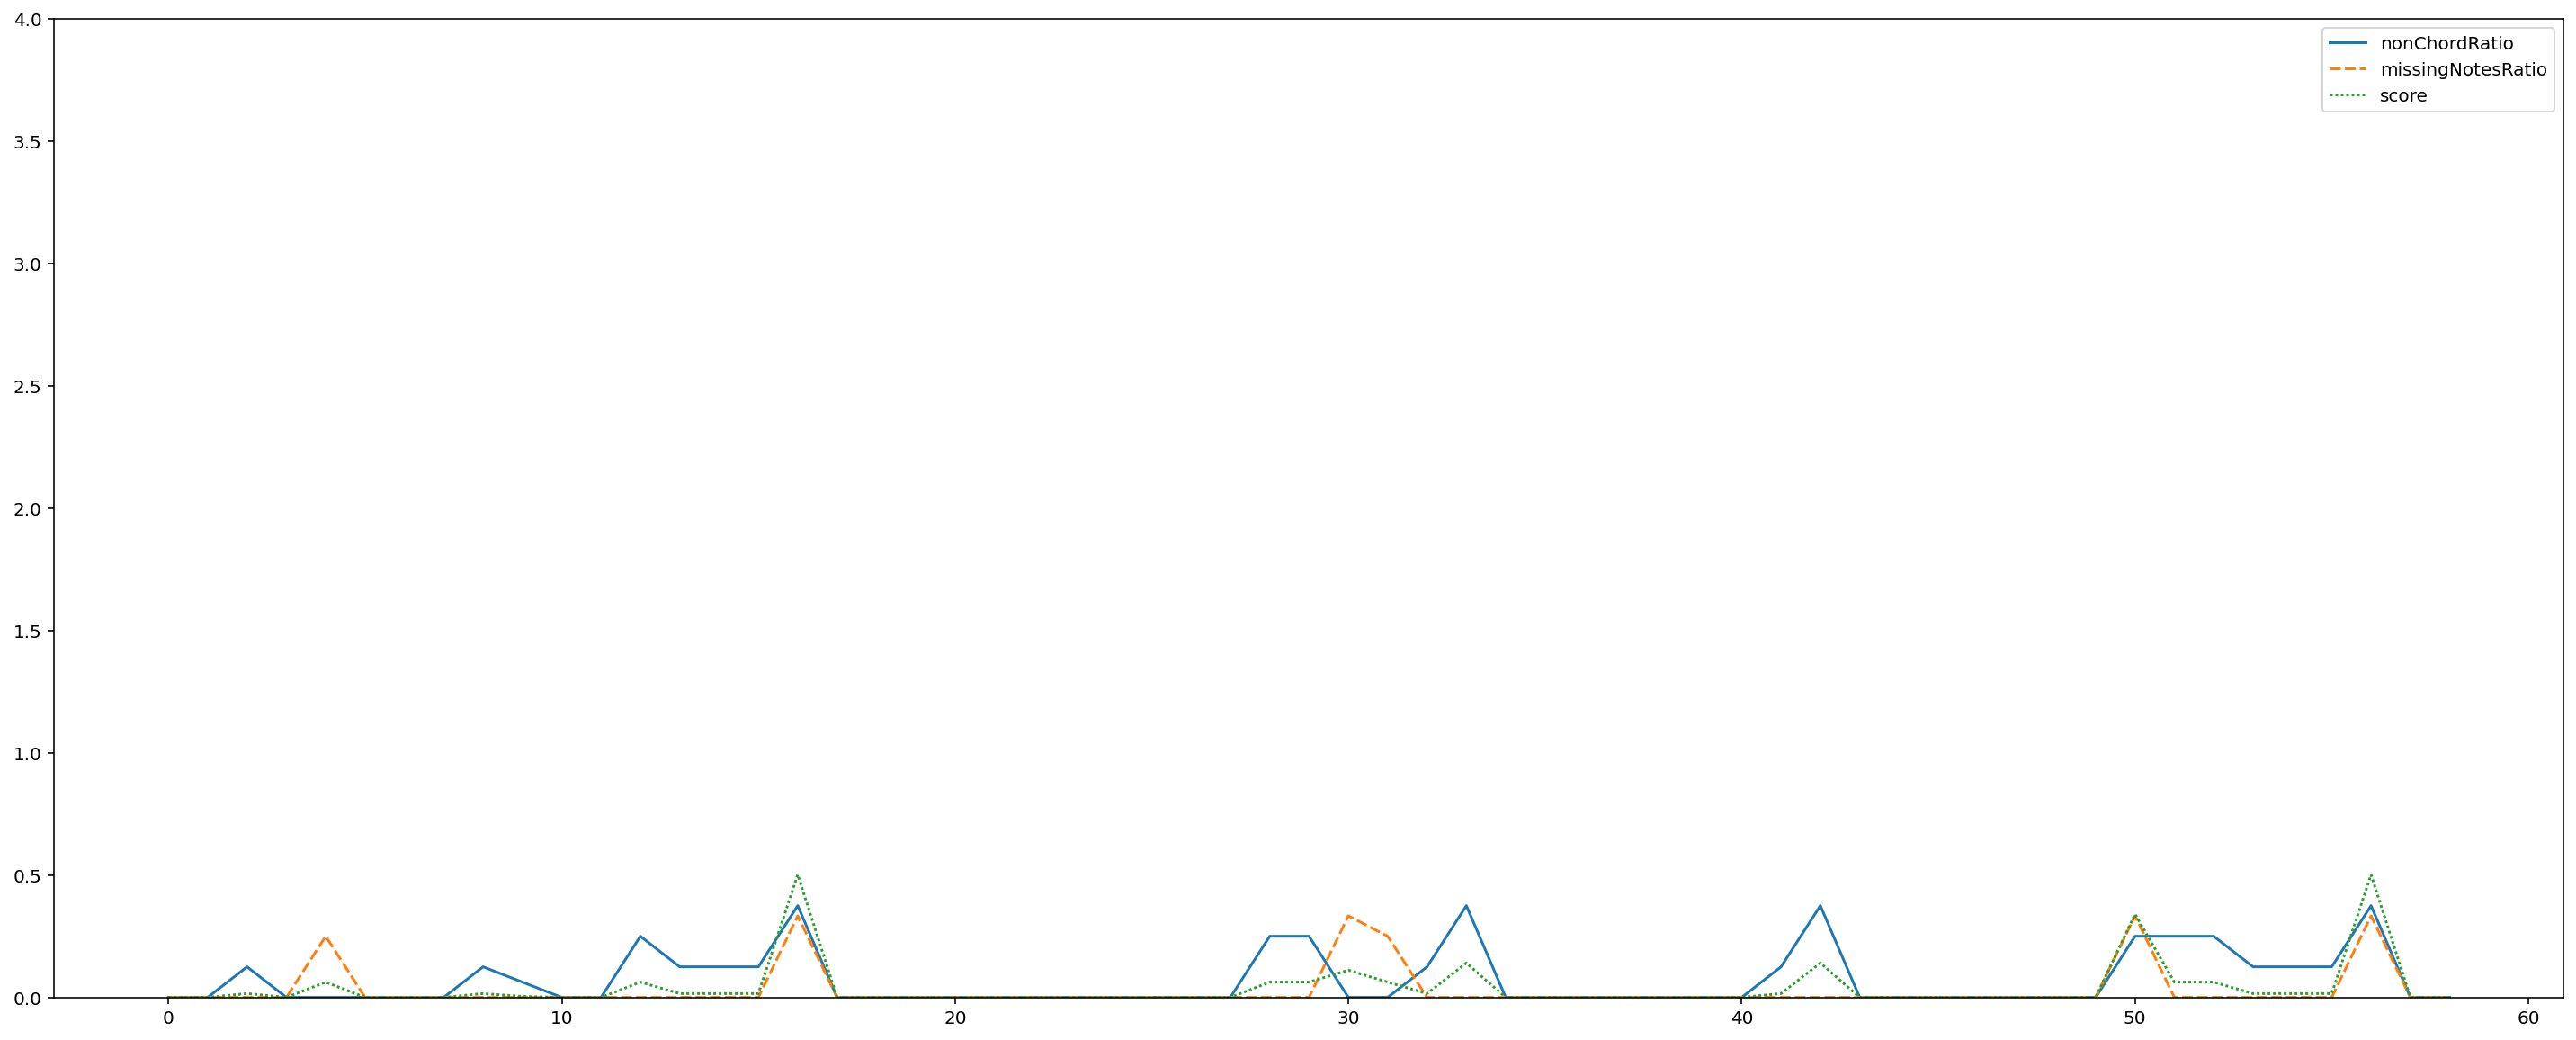

In [9]:
qualitydf["score"] = (qualitydf.nonChordRatio + qualitydf.missingNotesRatio)**2
print(qualitydf.nonChordRatio.sum(), qualitydf.missingNotesRatio.sum(), qualitydf.score.sum())
print("Top problematic annotations:")
display(qualitydf[qualitydf.score >= 1.0])
plt.figure(figsize=(25, 10))
sns.lineplot(data=qualitydf[["nonChordRatio", "missingNotesRatio", "score"]])
plt.ylim(0, 4)

<AxesSubplot:xlabel='romanNumeral', ylabel='score'>

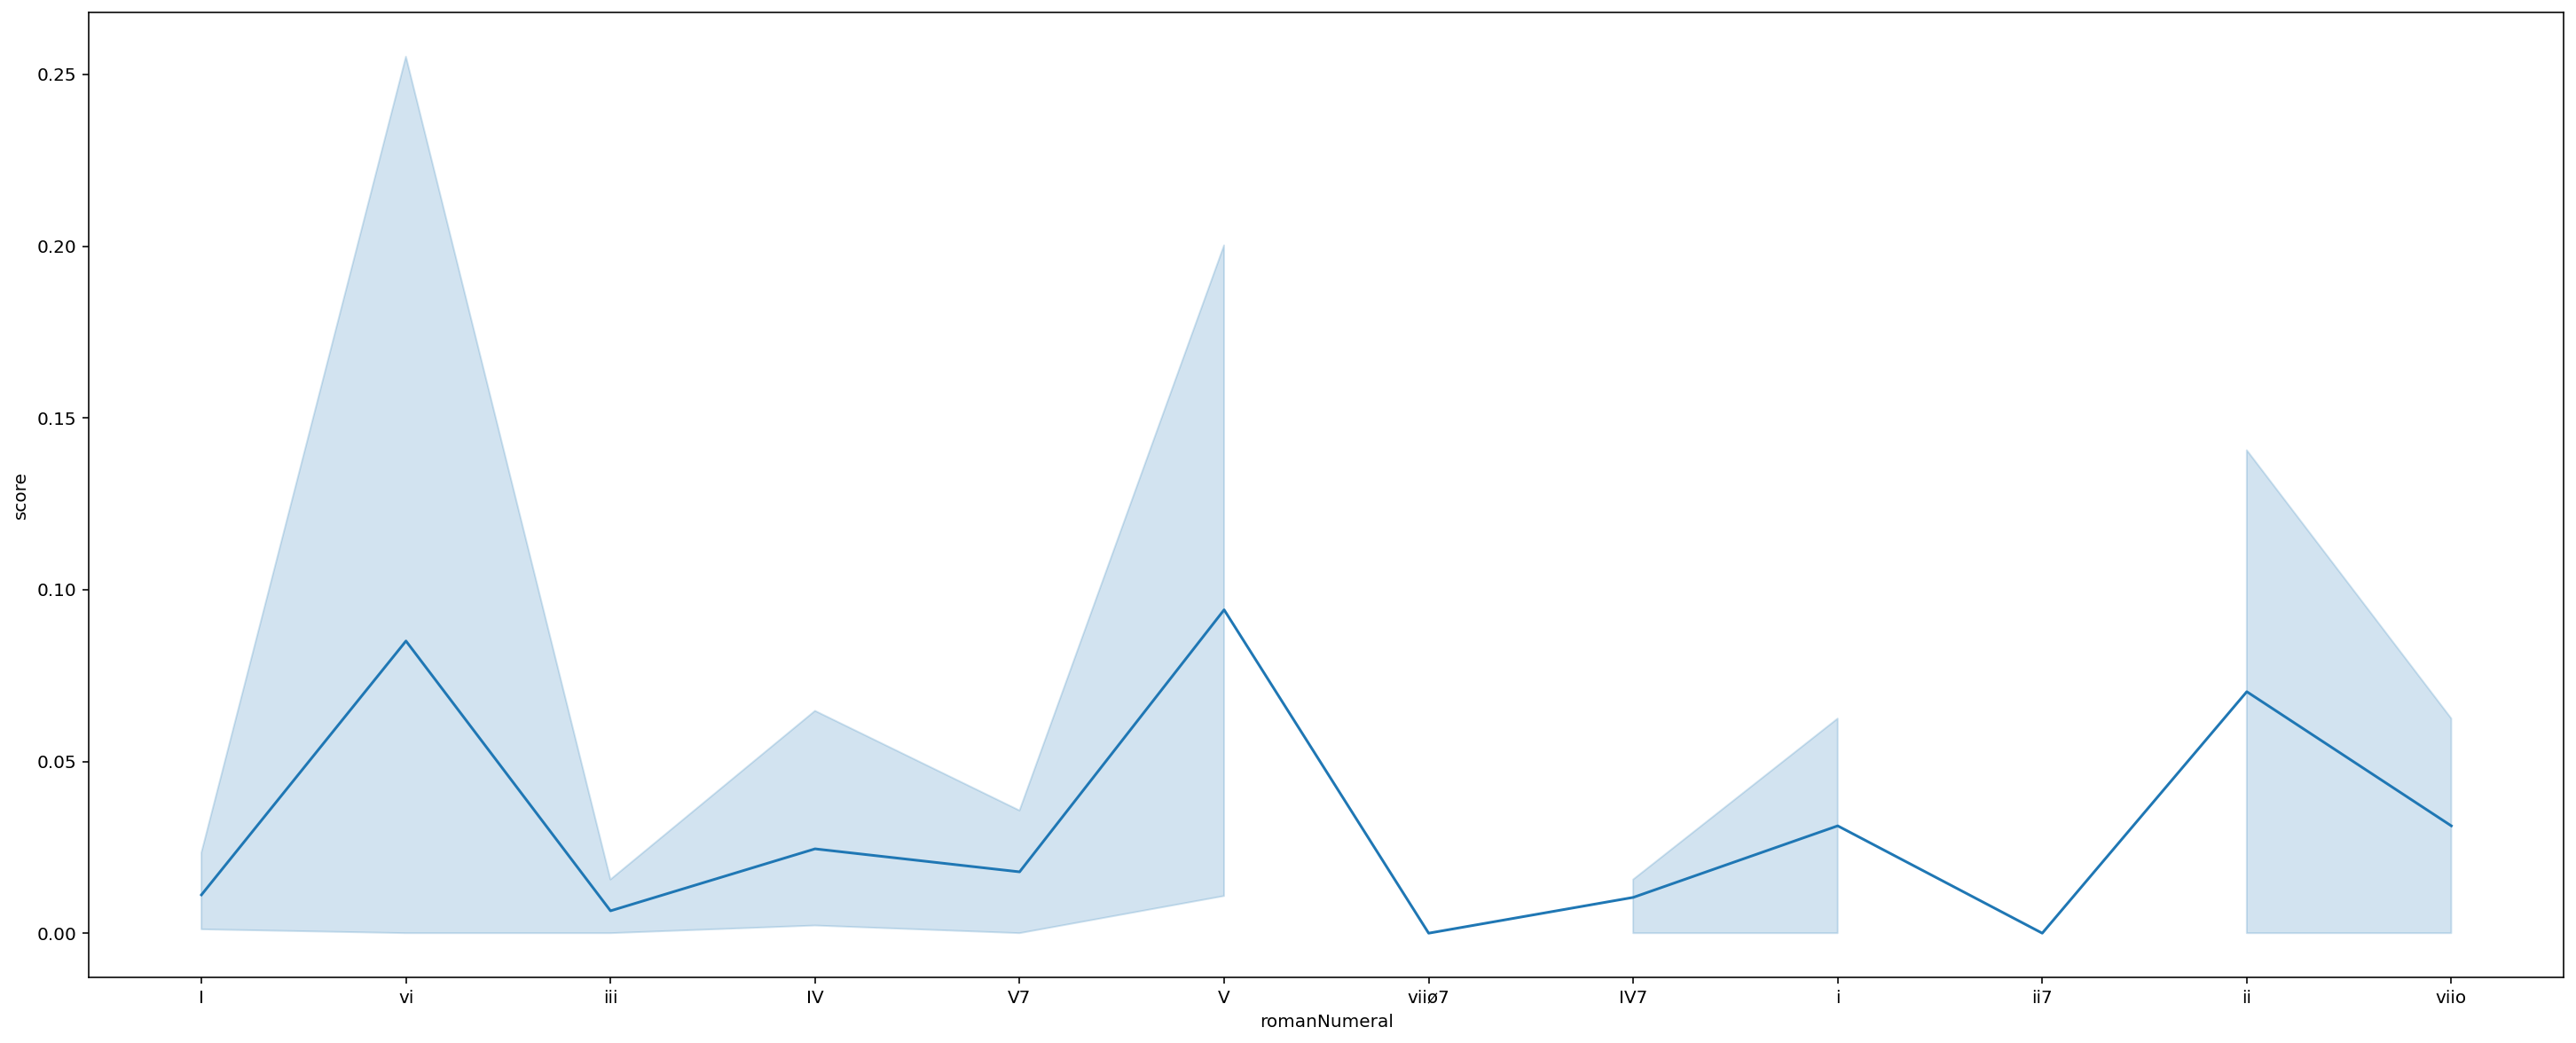

In [10]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=qualitydf, x="romanNumeral", y="score")